In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re


In [2]:

df_train = pd.read_csv('twitter_training.csv', header=None, names=['ID', 'Entity', 'Sentiment', 'Tweet'])
df_val = pd.read_csv('twitter_validation.csv', header=None, names=['ID', 'Entity', 'Sentiment', 'Tweet'])


In [3]:

df = pd.concat([df_train, df_val], ignore_index=True)
df = df[['Entity', 'Sentiment', 'Tweet']].dropna()
df = df[df['Sentiment'].isin(['Positive', 'Negative', 'Neutral'])]


In [4]:

df['Tweet'] = df['Tweet'].astype(str)
df['Clean_Tweet'] = df['Tweet'].apply(lambda x: re.sub(r'http\S+|@\S+|#[A-Za-z0-9_]+|[^a-zA-Z\s]', '', x.lower()))



/tmp/ipython-input-5-1982032955.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='Set2')


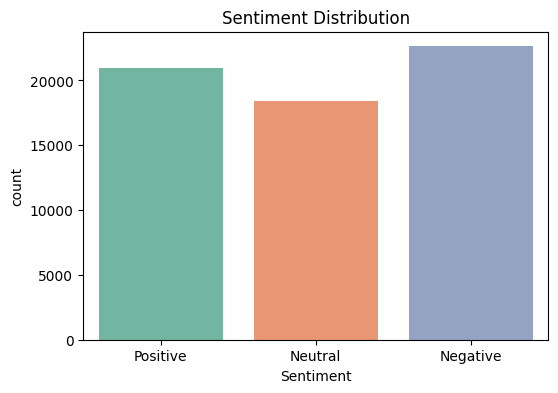

In [5]:

plt.figure(figsize=(6, 4))
sns.countplot(x='Sentiment', data=df, palette='Set2')
plt.title('Sentiment Distribution')
plt.show()


In [6]:

positive_text = ' '.join(df[df['Sentiment'] == 'Positive']['Clean_Tweet'])
negative_text = ' '.join(df[df['Sentiment'] == 'Negative']['Clean_Tweet'])
neutral_text = ' '.join(df[df['Sentiment'] == 'Neutral']['Clean_Tweet'])


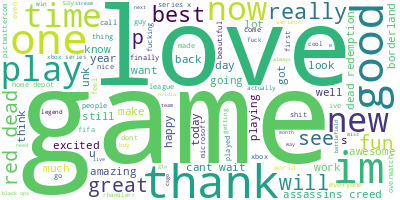

<Figure size 1000x500 with 0 Axes>

In [7]:

plt.figure(figsize=(10, 5))
WordCloud(background_color='white', max_words=100).generate(positive_text).to_image()


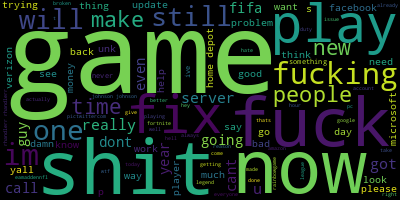

<Figure size 1000x500 with 0 Axes>

In [8]:

plt.figure(figsize=(10, 5))
WordCloud(background_color='black', max_words=100).generate(negative_text).to_image()



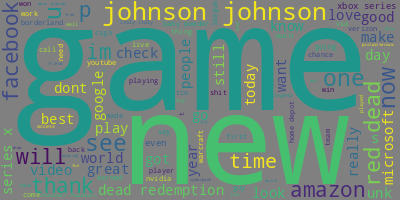

<Figure size 1000x500 with 0 Axes>

In [9]:
plt.figure(figsize=(10, 5))
WordCloud(background_color='gray', max_words=100).generate(neutral_text).to_image()


In [10]:

top_entities = df['Entity'].value_counts().head(10).index.tolist()
df_top = df[df['Entity'].isin(top_entities)]


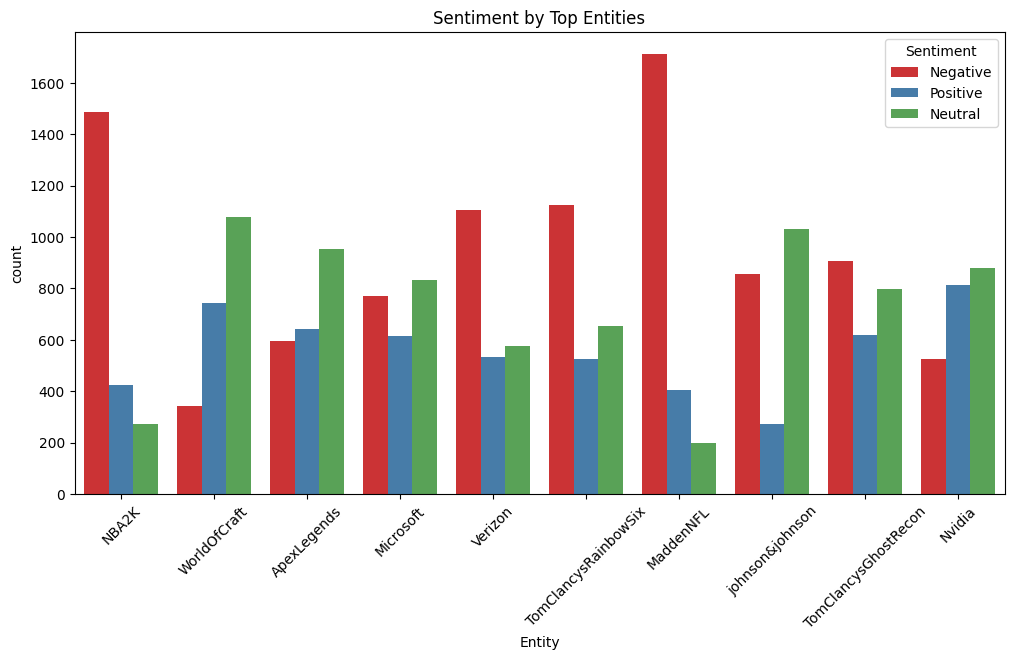

In [11]:

plt.figure(figsize=(12, 6))
sns.countplot(x='Entity', hue='Sentiment', data=df_top, palette='Set1')
plt.title('Sentiment by Top Entities')
plt.xticks(rotation=45)
plt.show()